# Preliminary info:
- Data comes pre-split into train test, however the test set only contains one instance of each class
- There are 29 subdirectories in the train set, 3 of which are nonalpha 
- We'll also disregard J and Z since they require movement to sign
- Train set: 87,000 images which are 200x200 pixels
- Test set: 29 images same reso
- Need to think about having an 'other' class

In [62]:
import pandas as pd
import numpy as np
import os



In [63]:
# Path where our data is located
base_path = "/Users/teodorastereciu/PycharmProjects/mlp/data/asl_data"

#base_path = os.getcwd()
  
#base_path = base_path.replace('notebooks', 'data') im really having issues getting this to work i'll just use my path for now

# Dictionary to save our classes
categories = {  0: "A",
                1: "B",
                2: "C",
                3: "D",
                4: "E",
                5: "F",
                6: "G",
                7: "H",
                8: "I",
                9: "G",
                10: "K",
                11: "L",
                12: "M",
                13: "N",
                14: "O",
                15: "P",
                16: "Q",
                17: "R",
                18: "S",
                19: "T",
                20: "U",
                21: "V",
                22: "W",
                23: "X",
                24: "Y",
            }

def add_class_name_prefix(df, col_name):
    df[col_name]
    return df


# list to store all the filenames in the dataset
filenames = []
# list to store the corresponding class
target = []

for category in categories:
    files = os.listdir(base_path + "/asl_alphabet_train/" + categories[category])
    filenames += files
    target += [category] * len(files)

df = pd.DataFrame({"filename": filenames, "category": target})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [64]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  75000 non-null  object
 1   category  75000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


,filename,category
0,I2579.jpg,8
1,H106.jpg,7
2,R2111.jpg,17
3,B602.jpg,1
4,U1693.jpg,20


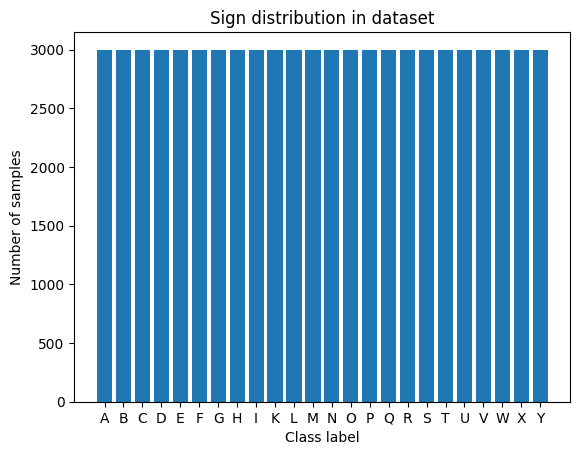

In [65]:
import matplotlib.pyplot as plt

# Assume that y is a list or array containing the class labels of your dataset
unique_labels, counts = np.unique(df['category'], return_counts=True)

plt.bar(list(categories.values()), counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Sign distribution in dataset')
plt.show()

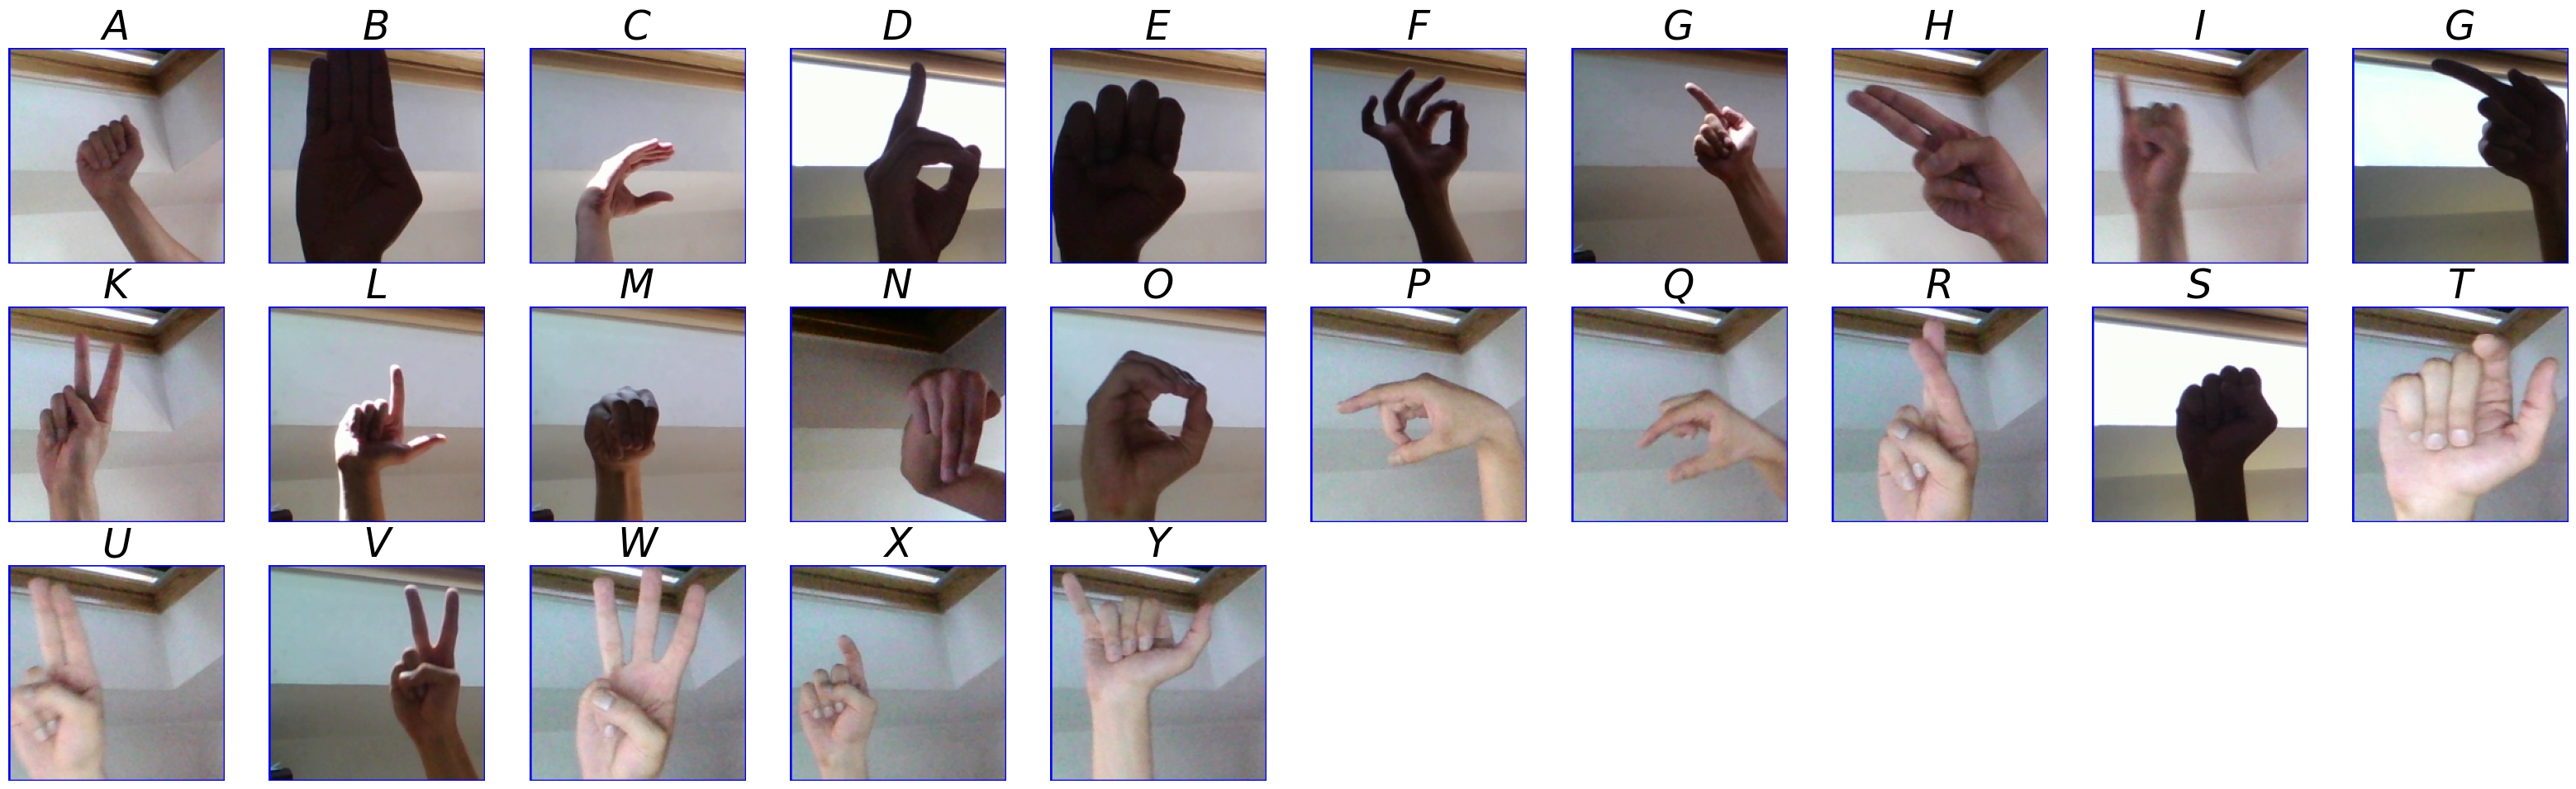

In [71]:
plt.figure(figsize=(40,40))

for i in range(25):
    img_names = df.loc[df["category"]==i]
    img_name = img_names.sample(ignore_index=True).filename[0]
    path = ""
    path = os.path.join(base_path + "/asl_alphabet_train", categories[i], img_name)
    img = plt.imread(path)
    plt.subplot(10,10, i + 1)
    plt.imshow(img)
    plt.title(categories[i],fontsize=35,fontstyle='italic')
    plt.axis("off")